# Task 1

In [ ]:
import os
import random
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder




import torch
import torch.nn as nn
import torch.utils.data
import torch.optim as optim
from torchsummary import summary
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
#!unzip data_transaction.zip
#!unzip data_identity.zip

Archive:  data_transaction.zip
  inflating: data_transaction.csv    
Archive:  data_identity.zip
  inflating: data_identity.csv       


In [ ]:

data_trans = pd.read_csv("data_transaction.csv")
data_identity = pd.read_csv("data_identity.csv")



In [ ]:
print("data transaction shape", data_trans.shape)
print("data identity shape", data_identity.shape)

data transaction shape (590540, 394)
data identity shape (144233, 41)


#### EDA

In [ ]:
df = data_trans.merge(data_identity,  on ='TransactionID', how='left')
# Merge the tables 
#df = pd.merge(left=data_trans, right=data_identity, left_on='TransactionID', right_on='TransactionID')

df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
del data_trans, data_identity

In [ ]:
df.shape 

(590540, 434)

In [ ]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [ ]:
cols = df.select_dtypes(include=[np.float64]).columns
df[cols] = df[cols].astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float32(399), int64(4), object(31)
memory usage: 1.0+ GB


In [ ]:
# Check for missing values
print(f'There are {df.isnull().any().sum()} columns in dataset with missing values.')

There are 414 columns in dataset with missing values.


In [ ]:
# Find unique values
one_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')


There are 0 columns in train dataset with one unique value.


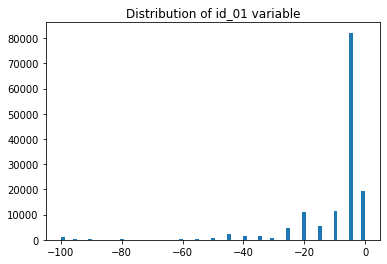

In [ ]:
# Checking the distribution for the features
plt.hist(df['id_01'], bins=77);
plt.title('Distribution of id_01 variable');

**Observation** id_01 has 77 unique non-positive values with skeweness to 0.

In [ ]:
df['id_03'].value_counts(dropna=False, normalize=True).head()


NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: id_03, dtype: float64

**Observation** id_03 has 88% of missing values and 98% of values are either missing or equal to 0.

In [ ]:
df['id_11'].value_counts(dropna=False, normalize=True).head()


NaN           0.761273
100.000000    0.225492
95.080002     0.002085
95.160004     0.001277
97.120003     0.000745
Name: id_11, dtype: float64

**Observation** 22% of values in id_11 are equal to 100and 76% are missing.

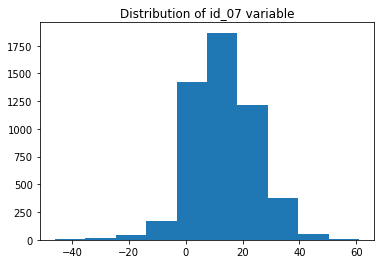

In [ ]:
plt.hist(df['id_07']);
plt.title('Distribution of id_07 variable');

#### Pre-processing

In [ ]:
list_cat = list(df.select_dtypes('object').columns.values)

In [ ]:
# Convert the categorical data

for col in list_cat:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))

#df = pd.get_dummies(df)
print(df.shape)

(590540, 434)


In [ ]:
y = df['isFraud'].to_numpy()
df.drop('isFraud', axis = 1, inplace = True)

In [ ]:
df_cleared = df.notna().astype("int").to_numpy()


In [ ]:
sc = StandardScaler()
mask = sc.fit_transform(df.fillna(0).to_numpy())


In [ ]:
full_data = np.hstack([mask, df_cleared])

In [ ]:
del df, mask, df_cleared

In [ ]:
full_data.shape

(590540, 866)

In [ ]:
full_data_shape = full_data.shape[1]

In [ ]:
#Splitting 
X_train, X_test, y_train, y_test = train_test_split( full_data, y, test_size=0.2, random_state=123)

In [ ]:
del full_data

In [ ]:
X_train.shape

(472432, 866)

#### Define the models

#### Undercomplete AE

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
## Undercomplete

class autoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
      super(autoencoder, self).__init__()
      # Step 1 : Define the encoder 
      # Step 2 : Define the decoder
      # Step 3 : Initialize the weights (optional)
      self.encoder = nn.Sequential(
          nn.Linear(input_size, input_size//2),
          nn.ReLU(True),
          nn.Linear(input_size//2, input_size//3),
          nn.Linear(input_size//3, input_size//4),
          nn.Tanh(),
          nn.Linear(input_size//4, latent_dim)
      )
      self.decoder = nn.Sequential(
          nn.Linear(latent_dim, input_size//4),
          nn.ReLU(True),
          nn.Linear(input_size//4, input_size//3),
          nn.Tanh(),
          nn.Linear(input_size//3, input_size//2)
      )
      self.encoder.apply(self.__init_weights)
      self.decoder.apply(self.__init_weights)
        
    def forward(self, x):
      # Step 1: Pass the input through encoder to get latent representation
      # Step 2: Take latent representation and pass through decoder
      x = self.encoder(x)
      x = self.decoder(x)
      return x
        
    
    def encode(self,input):
      #Step 1: Pass the input through the encoder to get latent representation
      return self.encoder(input)
    
    def decode(self, input):
      return self.decoder(input)
    
    def __init_weights(self,m):
      #Init the weights (optional)
      if type(m) == nn.Linear:
          torch.nn.init.xavier_uniform_(m.weight)
          m.bias.data.fill_(0.01)

In [ ]:
# Define training parameters

min_lose = 10
batchSize = 512
learning_rate = 0.001
num_epochs = 50
latent_size = 50
###sample = torch.randn((batchSize,1,64))
AE = autoencoder(full_data_shape , latent_size).to(device)
print(AE)
# print(summary(AE,input_size=(1, 64)))

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(),lr=learning_rate)

# create DataLoaders
dataLoader_train = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=batchSize, shuffle=True)
dataLoader_test = DataLoader(TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test)), batch_size=batchSize, shuffle=True)

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=866, out_features=433, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=433, out_features=288, bias=True)
    (3): Linear(in_features=288, out_features=216, bias=True)
    (4): Tanh()
    (5): Linear(in_features=216, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=216, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=216, out_features=288, bias=True)
    (3): Tanh()
    (4): Linear(in_features=288, out_features=433, bias=True)
  )
)


In [ ]:
## Trainning the Autoencoder
ind = full_data_shape//2
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in dataLoader_train:
    X = X[0].to(device)
    optimizer.zero_grad()

    # forward
    output = AE(X)
    loss = criterion(output * X[:, ind:], X[:, :ind])
    #print(output.dtype)
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  # log

  print('epoch [{}/{}], train_loss:{:.4f}'.format(epoch + 1, num_epochs, epoch_loss / len(dataLoader_train)))

epoch [1/50], train_loss:0.3417
epoch [2/50], train_loss:0.2561
epoch [3/50], train_loss:0.2330
epoch [4/50], train_loss:0.2171
epoch [5/50], train_loss:0.2042
epoch [6/50], train_loss:0.1964
epoch [7/50], train_loss:0.1887
epoch [8/50], train_loss:0.2966
epoch [9/50], train_loss:0.2755
epoch [10/50], train_loss:0.2484
epoch [11/50], train_loss:0.2485
epoch [12/50], train_loss:0.2575
epoch [13/50], train_loss:0.2255
epoch [14/50], train_loss:0.2259
epoch [15/50], train_loss:0.2245
epoch [16/50], train_loss:0.2207
epoch [17/50], train_loss:0.2113
epoch [18/50], train_loss:0.2252
epoch [19/50], train_loss:0.2321
epoch [20/50], train_loss:0.2214
epoch [21/50], train_loss:0.2199
epoch [22/50], train_loss:0.2152
epoch [23/50], train_loss:0.2267
epoch [24/50], train_loss:0.2237
epoch [25/50], train_loss:0.2070
epoch [26/50], train_loss:0.2027
epoch [27/50], train_loss:0.2132
epoch [28/50], train_loss:0.2103
epoch [29/50], train_loss:0.2043
epoch [30/50], train_loss:0.2089
epoch [31/50], trai

In [ ]:
# Test 
min_undercomplete_loss = 10
minimum_loss_un = AE.state_dict()

for epoch in range(num_epochs):
  with torch.no_grad():
    loss = 0
    for X in dataLoader_test:
      X = X[0].to(device)
      
      output = AE(X)
      loss += criterion(output * X[:, ind:], X[:, :ind]).item()
    res = loss / len(dataLoader_test)
    if res < min_undercomplete_loss:
        min_undercomplete_loss = res
        minimum_loss_un = AE.state_dict()
    else: 
        AE.load_state_dict(minimum_loss_un)
    print('epoch [{}/{}], test_loss:{:.4f}'.format(epoch + 1, num_epochs, res ))

epoch [1/50], test_loss:0.2049
epoch [2/50], test_loss:0.2049
epoch [3/50], test_loss:0.2049
epoch [4/50], test_loss:0.2049
epoch [5/50], test_loss:0.2049
epoch [6/50], test_loss:0.2050
epoch [7/50], test_loss:0.2050
epoch [8/50], test_loss:0.2050
epoch [9/50], test_loss:0.2050
epoch [10/50], test_loss:0.2049
epoch [11/50], test_loss:0.2049
epoch [12/50], test_loss:0.2049
epoch [13/50], test_loss:0.2049
epoch [14/50], test_loss:0.2052
epoch [15/50], test_loss:0.2049
epoch [16/50], test_loss:0.2049
epoch [17/50], test_loss:0.2050
epoch [18/50], test_loss:0.2049
epoch [19/50], test_loss:0.2049
epoch [20/50], test_loss:0.2049
epoch [21/50], test_loss:0.2050
epoch [22/50], test_loss:0.2050
epoch [23/50], test_loss:0.2049
epoch [24/50], test_loss:0.2050
epoch [25/50], test_loss:0.2050
epoch [26/50], test_loss:0.2049
epoch [27/50], test_loss:0.2049
epoch [28/50], test_loss:0.2049
epoch [29/50], test_loss:0.2049
epoch [30/50], test_loss:0.2051
epoch [31/50], test_loss:0.2050
epoch [32/50], te

In [ ]:
torch.save(minimum_loss_un, "minimum_loss_undercomplete")


#### Regularized AE 

**Sparse autoencoder**

In [ ]:
def regLoss(data):
    AE_children = list(AE.children())
    l = 0
    v = data
    for x in range(len(AE_children)):
        v = F.relu((AE_children[x](v)))
        l += torch.mean(torch.abs(v))
    return l

In [ ]:
# Train
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in dataLoader_train:
    X = X[0].to(device)
    optimizer.zero_grad()

    # forward
    output = AE(X)
    loss = criterion(output * X[:, ind:], X[:, :ind])
    l1_loss = regLoss(X)
    loss = loss +  l1_loss
    #print(output.dtype)
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  # log
  print('epoch [{}/{}], train_loss:{:.4f}'.format(epoch + 1, num_epochs, epoch_loss / len(dataLoader_train)))

epoch [1/50], train_loss:0.2614
epoch [2/50], train_loss:0.2200
epoch [3/50], train_loss:0.2228
epoch [4/50], train_loss:0.2150
epoch [5/50], train_loss:0.2216
epoch [6/50], train_loss:0.2142
epoch [7/50], train_loss:0.2211
epoch [8/50], train_loss:0.2176
epoch [9/50], train_loss:0.2144
epoch [10/50], train_loss:0.2167
epoch [11/50], train_loss:0.2146
epoch [12/50], train_loss:0.2149
epoch [13/50], train_loss:0.2210
epoch [14/50], train_loss:0.2247
epoch [15/50], train_loss:0.2140
epoch [16/50], train_loss:0.2133
epoch [17/50], train_loss:0.2116
epoch [18/50], train_loss:0.2112
epoch [19/50], train_loss:0.2291
epoch [20/50], train_loss:0.2189
epoch [21/50], train_loss:0.2185
epoch [22/50], train_loss:0.2204
epoch [23/50], train_loss:0.2222
epoch [24/50], train_loss:0.2138
epoch [25/50], train_loss:0.2072
epoch [26/50], train_loss:0.2091
epoch [27/50], train_loss:0.2058
epoch [28/50], train_loss:0.2046
epoch [29/50], train_loss:0.2089
epoch [30/50], train_loss:0.2202
epoch [31/50], trai

In [ ]:
# Test
min_reg_ae = 10
minimum_loss_re = AE.state_dict()

for epoch in range(num_epochs):
  with torch.no_grad():
    loss = 0
    for X in dataLoader_test:
      X = X[0].to(device)
      
      output = AE(X)
      loss += criterion(output * X[:, ind:], X[:, :ind]).item()
    
    print('epoch [{}/{}], test_loss:{:.4f}'.format(epoch + 1, num_epochs, loss / len(dataLoader_test)))
    if (loss / len(dataLoader_test)) < min_reg_ae:
      min_reg_ae = (loss / len(dataLoader_test))
      minimum_loss_re = AE.state_dict()
    else: 
        AE.load_state_dict(minimum_loss_re)


epoch [1/50], test_loss:0.2000
epoch [2/50], test_loss:0.1999
epoch [3/50], test_loss:0.1997
epoch [4/50], test_loss:0.1999
epoch [5/50], test_loss:0.1999
epoch [6/50], test_loss:0.2027
epoch [7/50], test_loss:0.1998
epoch [8/50], test_loss:0.1997
epoch [9/50], test_loss:0.2000
epoch [10/50], test_loss:0.1999
epoch [11/50], test_loss:0.1999
epoch [12/50], test_loss:0.2003
epoch [13/50], test_loss:0.1998
epoch [14/50], test_loss:0.2003
epoch [15/50], test_loss:0.1999
epoch [16/50], test_loss:0.1998
epoch [17/50], test_loss:0.2000
epoch [18/50], test_loss:0.1999
epoch [19/50], test_loss:0.2008
epoch [20/50], test_loss:0.1997
epoch [21/50], test_loss:0.1998
epoch [22/50], test_loss:0.1997
epoch [23/50], test_loss:0.2008
epoch [24/50], test_loss:0.1997
epoch [25/50], test_loss:0.2009
epoch [26/50], test_loss:0.1998
epoch [27/50], test_loss:0.1998
epoch [28/50], test_loss:0.1999
epoch [29/50], test_loss:0.1998
epoch [30/50], test_loss:0.2010
epoch [31/50], test_loss:0.1998
epoch [32/50], te

In [ ]:
torch.save(minimum_loss_re, "minimum_loss_Regularized")


#### Variational AE 

In [ ]:
# VAE model

class VAE(nn.Module):
    def __init__(self, input_dim= full_data.shape[1], h_dim= 389, z_dim=5):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, input_dim//2)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc4(z))
        return self.fc5(h)
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

model = VAE().to(device)

In [ ]:
print(model)


VAE(
  (fc1): Linear(in_features=778, out_features=389, bias=True)
  (fc2): Linear(in_features=389, out_features=5, bias=True)
  (fc3): Linear(in_features=389, out_features=5, bias=True)
  (fc4): Linear(in_features=5, out_features=389, bias=True)
  (fc5): Linear(in_features=389, out_features=389, bias=True)
)


In [ ]:
# Train
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in dataLoader_train:
    X = X[0].to(device)
    optimizer.zero_grad()

    # forward
    x_reconst, mu, log_var = model(X)
    loss = criterion(x_reconst*X[:, ind:], X[:, :ind])
    kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    loss += kl_div

    #print(output.dtype)
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  # log
  print('epoch [{}/{}], train_loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))

epoch [1/50], train_loss:32.5471
epoch [2/50], train_loss:25.9521
epoch [3/50], train_loss:32.1549
epoch [4/50], train_loss:32.6807
epoch [5/50], train_loss:20.9882
epoch [6/50], train_loss:23.0161
epoch [7/50], train_loss:28.7523
epoch [8/50], train_loss:31.4485
epoch [9/50], train_loss:29.0393
epoch [10/50], train_loss:19.8426
epoch [11/50], train_loss:35.7764
epoch [12/50], train_loss:25.0710
epoch [13/50], train_loss:29.5866
epoch [14/50], train_loss:34.3789
epoch [15/50], train_loss:35.8678
epoch [16/50], train_loss:203.2830
epoch [17/50], train_loss:27.0489
epoch [18/50], train_loss:28.3591
epoch [19/50], train_loss:24.0067
epoch [20/50], train_loss:22.2269
epoch [21/50], train_loss:24.6657
epoch [22/50], train_loss:31.5977
epoch [23/50], train_loss:34.3280
epoch [24/50], train_loss:27.1938
epoch [25/50], train_loss:29.4029
epoch [26/50], train_loss:25.3846
epoch [27/50], train_loss:24.0688
epoch [28/50], train_loss:23.4872
epoch [29/50], train_loss:26.7886
epoch [30/50], train_l

In [ ]:
# Test
min_variational_ae = 10
for epoch in range(num_epochs):
  with torch.no_grad():
    loss = 0
    for X in dataLoader_test:
      X = X[0].to(device)
      
      x_reconst, mu, log_var = model(X)
      loss += criterion(x_reconst * X[:, ind:], X[:, :ind]).item()
    
    print('epoch [{}/{}], test_loss:{:.4f}'.format(epoch + 1, num_epochs, loss / len(dataLoader_test)))
    if (loss / len(dataLoader_test)) < min_variational_ae:
      min_variational_ae = (loss / len(dataLoader_test))

epoch [1/50], test_loss:0.9592
epoch [2/50], test_loss:0.9570
epoch [3/50], test_loss:0.9597
epoch [4/50], test_loss:0.9555
epoch [5/50], test_loss:0.9567
epoch [6/50], test_loss:0.9550
epoch [7/50], test_loss:0.9544
epoch [8/50], test_loss:0.9539
epoch [9/50], test_loss:0.9578
epoch [10/50], test_loss:0.9562
epoch [11/50], test_loss:0.9573
epoch [12/50], test_loss:0.9577
epoch [13/50], test_loss:0.9600
epoch [14/50], test_loss:0.9626
epoch [15/50], test_loss:0.9562
epoch [16/50], test_loss:0.9563
epoch [17/50], test_loss:0.9626
epoch [18/50], test_loss:0.9564
epoch [19/50], test_loss:0.9607
epoch [20/50], test_loss:0.9568
epoch [21/50], test_loss:0.9570
epoch [22/50], test_loss:0.9605
epoch [23/50], test_loss:0.9711
epoch [24/50], test_loss:0.9562
epoch [25/50], test_loss:0.9563
epoch [26/50], test_loss:0.9587
epoch [27/50], test_loss:0.9573
epoch [28/50], test_loss:0.9547
epoch [29/50], test_loss:0.9557
epoch [30/50], test_loss:0.9561
epoch [31/50], test_loss:0.9606
epoch [32/50], te

### Perfomence of autoencoder

In [ ]:
print("Undercomplete AE >> Best loss  ::", min_undercomplete_loss)
print("Regularized  AE >> Best loss  ::", min_reg_ae)
print("Variational AE >> Best loss  ::", min_variational_ae)

Undercomplete AE >> Best loss  :: 0.2046424273336143
Regularized  AE >> Best loss  :: 0.19962961971759796
Variational AE >> Best loss  :: 0.9533320173882601


####  Compare with statistical approach

In [ ]:
model = autoencoder(full_data_shape , latent_size).to(device)
model.load_state_dict(torch.load("minimum_loss_Regularized"))
model.eval()


autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=778, out_features=389, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=389, out_features=259, bias=True)
    (3): Linear(in_features=259, out_features=194, bias=True)
    (4): Tanh()
    (5): Linear(in_features=194, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=194, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=194, out_features=259, bias=True)
    (3): Tanh()
    (4): Linear(in_features=259, out_features=389, bias=True)
  )
)

In [ ]:

def create_data(data, model):
  train,target =[],[]
  for x, y in dataLoader_train:
      x = x.to(device)
      train.append(model(x).cpu().detach().numpy())
      target.append(y.cpu().detach().numpy())
  train = np.concatenate(train,  axis=0)
  target = np.concatenate(target,  axis=0)
  return train, target

train_x, train_y = create_data(dataLoader_train, model )
test_x, test_y = create_data(dataLoader_test, model )

In [ ]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)
pred = clf.predict(test_x)
print(classification_report(test_y, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    106268
         1.0       0.80      0.33      0.46      9118

    accuracy                           0.94    115386
   macro avg       0.87      0.66      0.72    115386
weighted avg       0.93      0.94      0.93    115386



In [ ]:
# Imputing the data with mean 

def create_data_mask(data, model, indicator):
  train,target, mask =[],[], []
  for x, y in dataLoader_train:
      x = x.cpu().detach().numpy()
      train.append(x[:, :indicator])
      mask.append(x[:, indicator:])
      target.append(y.cpu().detach().numpy())
  train = np.concatenate(train,  axis=0)
  mask = np.concatenate(mask,  axis=0)
  target = np.concatenate(target,  axis=0)
  train = np.where(mask < 1, np.ma.array(train, mask=(mask < 1)).mean(axis=0), train)
  return train, target

train_x, train_y = create_data_mask(dataLoader_train, model ,ind)
test_x, test_y = create_data_mask(dataLoader_test, model ,ind)



In [ ]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)
pred = clf.predict(test_x)
print(classification_report(test_y, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    106268
         1.0       0.85      0.45      0.59      9118

    accuracy                           0.95    115386
   macro avg       0.90      0.72      0.78    115386
weighted avg       0.95      0.95      0.94    115386



## PCA Vs LDA

#### PCA

In [ ]:
xTrain, yTrain = create_data(dataLoader_train, model )
xTest, yTest = create_data(dataLoader_test, model )

In [ ]:
# survice function for Explained variance ratio plotting
def plot_explained_variance(X):
    #Calculating Eigenvecors and eigenvalues of Covariance matrix
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Create a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Sort from high to low
    eig_pairs.sort(key = lambda x: x[0], reverse= True)

    # Calculation of Explained Variance from the eigenvalues
    tot = sum(eig_vals)
    print(tot)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
    print(var_exp)
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    print(cum_var_exp)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

(389.00337135865396+0j)
[(24.94256840181095+0j), (9.651696268902132+0j), (7.5725386821467735+0j), (5.539460220077744+0j), (4.800225113920192+0j), (4.596720332111096+0j), (3.7868429404049024+0j), (3.3115658547559144+0j), (2.698839067367609+0j), (2.4078612495220386+0j), (2.0673285108727306+0j), (1.7067288852213067+0j), (1.6246544463322208+0j), (1.5814380329514557+0j), (1.541123549429841+0j), (1.4197102693185546+0j), (1.3464014003746392+0j), (1.0454948609347108+0j), (0.9147404862009205+0j), (0.8835846843080926+0j), (0.8217770557014467+0j), (0.7845909034768931+0j), (0.7353263629302932+0j), (0.6991873112781657+0j), (0.6598276609485711+0j), (0.6455064949947948+0j), (0.5725426210073029+0j), (0.5633881991808832+0j), (0.5236118928360486+0j), (0.4705751137168971+0j), (0.42769999420897464+0j), (0.41930682578336853+0j), (0.40239296325510304+0j), (0.37531779383000186+0j), (0.34594510429220676+0j), (0.3162760094110595+0j), (0.3126555089166377+0j), (0.3071885163257777+0j), (0.2956605782815557+0j), (0

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


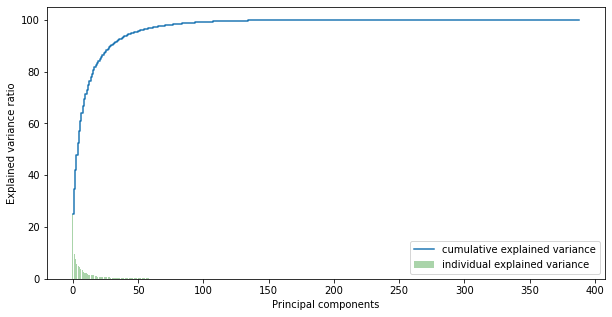

In [ ]:
plot_explained_variance(sc.fit_transform(xTrain))


In [ ]:
pca = PCA(n_components= 150)
xTrain_reduced = pca.fit(xTrain).transform(xTrain)
xTest_reduced = pca.fit(xTest).transform(xTest)

In [ ]:
clf = LogisticRegression(random_state=0).fit(xTrain_reduced, yTrain)
pred = clf.predict(xTest_reduced)
print(classification_report(yTest, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97    106268
         1.0       0.80      0.32      0.46      9118

    accuracy                           0.94    115386
   macro avg       0.87      0.66      0.71    115386
weighted avg       0.93      0.94      0.93    115386



#### LDA

In [ ]:
lda = LDA()
xTrain_lda = lda.fit(xTrain, yTrain).transform(xTrain)
xTest_lda = lda.transform(xTest)


In [ ]:
clf = LogisticRegression(random_state=0).fit(xTrain_lda, yTrain)
pred = clf.predict(xTest_lda)
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    106268
         1.0       0.79      0.35      0.48      9118

    accuracy                           0.94    115386
   macro avg       0.87      0.67      0.73    115386
weighted avg       0.93      0.94      0.93    115386



**observation**

From classification report, we can find that PCA is better than LDA

# Task 2 

**Importing the libraries**

In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#clear_output()


In [ ]:
#import os
#os._exit(00)

In [2]:
#!pip install interpret


In [1]:
import os
import random
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.utils.data
import torch.optim as optim
from torchsummary import summary
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# Getting Data
df_train = pd.read_csv('UNSW_NB15_training-set.csv')
df_test = pd.read_csv('UNSW_NB15_testing-set.csv')
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


## Pre-processing

In [ ]:
## Find some useless features and remove it 
# Refernce : https://github.com/ydataai/pandas-profiling/issues/190
import pandas_profiling

pd_prof = df_train.profile_report()
rejected = pd_prof.get_rejected_variables()
print(rejected)

['ct_src_dport_ltm', 'ct_srv_dst', 'ct_srv_src', 'dloss', 'dpkts', 'is_ftp_login', 'sinpkt', 'sloss', 'spkts', 'swin', 'tcprtt']


In [4]:
## Clear the train data 
df_train.drop(rejected, axis=1, inplace=True)
y_train  = df_train['attack_cat']
df_train.drop(["label","attack_cat", "id"], axis=1, inplace=True)

df_test.drop(rejected, axis=1, inplace=True)
y_test  = df_test['attack_cat']
df_test.drop(["label","attack_cat", "id"], axis=1, inplace=True)

In [5]:
print("data train shape: ", df_train.shape)
print("data test shape: ", df_test.shape)

data train shape:  (82332, 31)
data test shape:  (175341, 31)


In [6]:
df_train.describe()

,dur,sbytes,dbytes,rate,sttl,dttl,sload,dload,dinpkt,sjit,...,trans_depth,response_body_len,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports
count,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,8.233200e+04,...,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,121.701284,6.363075e+03,...,0.094277,1.595372e+03,1.369273,5.744923,3.663011,7.456360,0.008381,0.129743,6.468360,0.011126
std,4.710444,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,1292.378499,5.672402e+04,...,0.542922,3.806697e+04,1.067188,8.418112,5.915386,11.415191,0.092485,0.638683,8.543927,0.104891
min,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000008,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.014138,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,0.010000,1.762392e+01,...,0.000000,0.000000e+00,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,3.000000,0.000000
75%,0.719360,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,63.136369,3.219332e+03,...,0.000000,0.000000e+00,2.000000,6.000000,3.000000,6.000000,0.000000,0.000000,7.000000,0.000000
max,59.999989,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,57739.240000,1.483831e+06,...,131.000000,5.242880e+06,6.000000,59.000000,38.000000,63.000000,2.000000,16.000000,60.000000,1.000000


In [7]:
# Find categorical data
list_cat = list(df_train.select_dtypes('object').columns.values)
print(list_cat)

['proto', 'service', 'state']


In [8]:
# Convert the categorical data
dataset = [df_train, df_test]
for df in dataset:
  for col in list_cat:
      if col in df.columns:
          le = LabelEncoder()
          le.fit(list(df[col].astype(str).values))
          df[col] = le.transform(list(df[col].astype(str).values))

print(df_train.shape)

(82332, 31)


In [9]:
## Scale the data using Robust Scaler
scaler = RobustScaler(quantile_range=(0.1, 99.9 ))
df_train_sc = pd.DataFrame(scaler.fit_transform(df_train[list(df_train.columns)].values),columns=list(df_train.columns))
df_test_sc = pd.DataFrame(scaler.transform(df_test[list(df_test.columns)].values),columns=list(df_test.columns))

df_train_sc.head()

,dur,proto,service,state,sbytes,dbytes,rate,sttl,dttl,sload,...,trans_depth,response_body_len,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports
0,-0.000236,0.047619,0.0,0.333333,-0.000051,-0.000163,0.088259,0.0,-0.115079,0.084486,...,0.0,0.0,0.166667,-0.023256,0.0,-0.018868,0.0,0.0,-0.045455,0.0
1,-0.000237,0.047619,0.0,0.333333,0.001659,-0.000163,0.122350,0.0,-0.115079,0.413733,...,0.0,0.0,0.166667,-0.023256,0.0,-0.018868,0.0,0.0,-0.045455,0.0
2,-0.000237,0.047619,0.0,0.333333,0.000721,-0.000163,0.197350,0.0,-0.115079,0.401233,...,0.0,0.0,0.166667,-0.023256,0.0,0.000000,0.0,0.0,-0.045455,0.0
3,-0.000237,0.047619,0.0,0.333333,0.000494,-0.000163,0.164016,0.0,-0.115079,0.281684,...,0.0,0.0,0.166667,0.000000,0.0,0.000000,0.0,0.0,-0.022727,0.0
4,-0.000236,0.047619,0.0,0.333333,0.002150,-0.000163,0.097350,0.0,-0.115079,0.399353,...,0.0,0.0,0.166667,0.000000,0.0,0.000000,0.0,0.0,-0.022727,0.0


In [10]:
le = LabelEncoder()
y_train = le.fit_transform(y_train.values.reshape(-1, 1))
y_test = le.transform(y_test.values.reshape(-1, 1))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [25]:
batch=128

X_train = torch.Tensor(df_train_sc.to_numpy())
X_test = torch.Tensor(df_test_sc.to_numpy())

y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


In [26]:
train, test = TensorDataset(X_train, y_train), TensorDataset(X_test, y_test)
train_DataLoader= DataLoader(train, batch_size=batch, shuffle=True)
test_DataLoader = DataLoader(test, batch_size=batch, shuffle=True)

In [14]:
class Generator(nn.Module):
    
  def __init__(self):
    super(Generator, self).__init__()
    
    self.generator = nn.Sequential(
      nn.Linear(100, 128),
      nn.Linear(128, 256),
      nn.ReLU(True),
      nn.Linear(256, 512),
      nn.ReLU(True),
      nn.Linear(512, 39)
    )
    
    self.generator.apply(self.__init_weights)

  def forward(self, z, y):
    y = F.one_hot(y, num_classes=10)
    
    z = torch.cat((z, y), 1)
    x = self.generator(z)
    
    return x
  
  def __init_weights(self,m):
    #Init the weights (optional)
    if type(m) == nn.Linear:
      torch.nn.init.xavier_uniform_(m.weight)
      m.bias.data.fill_(0.01)
 

In [15]:
class Discriminator(nn.Module):

  def __init__(self, h_dim=128):
    super(Discriminator, self).__init__()
    
    self.discriminator = nn.Sequential(
      nn.Linear(49, 512),
      nn.Linear(512, 256),
      nn.LeakyReLU(inplace=True),
      nn.Linear(256, 128),
      nn.LeakyReLU(inplace=True),
      nn.Linear(128, 1),
      nn.Sigmoid()
    )
    
    self.discriminator.apply(self.__init_weights)

  def forward(self, x, y):
    y = F.one_hot(y, num_classes=10)
    
    x = torch.cat((x, y), 1)
    x = self.discriminator(x)
    
    return x
  
  def __init_weights(self,m):
    if type(m) == nn.Linear:
      torch.nn.init.xavier_uniform_(m.weight)
      m.bias.data.fill_(0.01)

In [16]:

def positiveLoss(output):
    
    y = torch.FloatTensor( output.size(0)).uniform_(0.9, 1).to(device)
    loss = nn.BCELoss()(output.squeeze(), y)
    return loss

In [17]:
def FalseLoss(output):
    y = torch.FloatTensor(output.size(0)).uniform_(0, 0.1).to(device) 
    loss = nn.BCELoss()(output.squeeze(), y)
    return loss

In [18]:
lr = 5e-4
Gen = Generator().to(device)
Dis = Discriminator().to(device)
Gen_opt = torch.optim.SGD(Gen.parameters(), lr=lr)
Dis_opt = torch.optim.SGD(Dis.parameters(), lr=lr)



In [ ]:

for epoch in range(30):

    for batch_i, (X, y) in enumerate(train_DataLoader):
        batch_size = X.size(0)
        z = np.random.uniform(-1, 1, size=(batch_size, 90))
        z = torch.from_numpy(z).float().to(device)
        Gen_opt.zero_grad()
        X, y = X.to(device), y.to(device)
        dReal = Dis(X, y)
        DLoss = positiveLoss(dReal)
        notReal_G = Gen(z, y)
        notReal_D = Dis(notReal_G, y)
        DLoss = DLoss + FalseLoss(notReal_D)
        DLoss.backward()
        Gen_opt.step()
        Gen_opt.zero_grad()
        notReal_G = Gen(z, y)
        g_loss = positiveLoss(Dis(notReal_G, y))
        g_loss.backward()
        Gen_opt.step()
            
    print('epoch [{}/{}], d_loss: {:6.4f} | g_loss: {:6.4f}'.format(epoch + 1, num_epochs, d_loss.item(), g_loss.item()))


epoch 1 , d_loss: 1.7360 | g_loss: 0.7758
epoch 2 , d_loss: 1.2128 | g_loss: 0.7685
epoch 3 , d_loss: 0.9504 | g_loss: 0.8929
epoch 4 , d_loss: 1.2400 | g_loss: 1.1020
epoch 5 , d_loss: 0.9983 | g_loss: 1.2528
epoch 6 , d_loss: 0.7344 | g_loss: 1.1920
epoch 7 , d_loss: 1.1000 | g_loss: 1.3653
epoch 8 , d_loss: 1.0416 | g_loss: 1.5756
epoch 9 , d_loss: 1.1677 | g_loss: 1.3380
epoch 10 , d_loss: 1.0651 | g_loss: 1.3616
epoch 11 , d_loss: 1.0108 | g_loss: 1.4940
epoch 12 , d_loss: 1.0013 | g_loss: 1.5678
epoch 13 , d_loss: 0.7823 | g_loss: 1.5905
epoch 14 , d_loss: 0.8193 | g_loss: 1.5621
epoch 15 , d_loss: 0.6519 | g_loss: 1.5199
epoch 16 , d_loss: 0.7749 | g_loss: 1.5705
epoch 17 , d_loss: 1.1557 | g_loss: 1.5877
epoch 18 , d_loss: 0.9515 | g_loss: 1.7632
epoch 19 , d_loss: 0.9055 | g_loss: 1.4526
epoch 20 , d_loss: 1.5029 | g_loss: 1.6936
epoch 21 , d_loss: 0.9462 | g_loss: 1.4911
epoch 22 , d_loss: 0.9276 | g_loss: 1.8217
epoch 23 , d_loss: 0.7071 | g_loss: 1.7590
epoch 24 , d_loss: 0

**classification**

In [ ]:
## Random Forest Classifier
clf_RF=RandomForestClassifier()
clf_RF.fit(X_train.numpy(),y_train.numpy())
y_pred=clf_RF.predict(X_test.numpy())
print(classification_report(y_pred,y_test.numpy()))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.05      0.97      0.09        90
           2       0.56      0.35      0.43     19937
           3       0.65      0.73      0.69     29645
           4       0.86      0.89      0.88     17562
           5       0.98      0.94      0.96     41997
           6       1.00      1.00      1.00     56013
           7       0.74      0.92      0.82      8483
           8       0.63      0.45      0.53      1585
           9       0.18      0.79      0.29        29

    accuracy                           0.85    175341
   macro avg       0.57      0.70      0.57    175341
weighted avg       0.86      0.85      0.85    175341



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Explainable Boosting Classifier
clf_exp = ExplainableBoostingClassifier()
clf_exp.fit(X_train.numpy(),y_train.numpy())
y_pred=clf_exp.predict(X_test.numpy())
print(classification_report(y_pred,y_test.numpy()))


/usr/local/lib/python3.7/dist-packages/interpret/glassbox/ebm/ebm.py:922: UserWarning: Multiclass is still experimental. Subject to change per release.
  warn("Multiclass is still experimental. Subject to change per release.")
/usr/local/lib/python3.7/dist-packages/interpret/glassbox/ebm/ebm.py:925: UserWarning: Detected multiclass problem: forcing interactions to 0
  warn("Detected multiclass problem: forcing interactions to 0")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.01      0.71      0.01        17
           2       0.49      0.33      0.39     18473
           3       0.68      0.69      0.68     32758
           4       0.84      0.85      0.85     18006
           5       0.98      0.99      0.98     39773
           6       1.00      1.00      1.00     56000
           7       0.75      0.85      0.80      9172
           8       0.56      0.57      0.56      1118
           9       0.11      0.58      0.18        24

    accuracy                           0.84    175341
   macro avg       0.54      0.66      0.55    175341
weighted avg       0.85      0.84      0.84    175341



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
##  Classical Neural Network

class classicalNN(nn.Module):
  def __init__(self, input_dim = 40, hid_dim= 30, output_dim=10):
    super(classicalNN, self).__init__()
    
    self.clf = nn.Sequential(
      nn.Linear(input_dim, hid_dim),
      nn.ReLU(True),
      nn.Linear(hid_dim, output_dim)
    )
    self.clf.apply(self.__init_weights)

  def forward(self, x):
    output = self.clf(x)
    return output

  def __init_weights(self,m):
    #Init the weights (optional)
    if type(m) == nn.Linear:
      torch.nn.init.xavier_uniform_(m.weight)
      m.bias.data.fill_(0.01)


def train(model, dataset, epochs, learning_rate):

    optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)
    criterion = nn.CrossEntropyLoss()
    model.train()

    for epoch in range(epochs):
        for X, y in dataset:
            X = X.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
        
    return model

In [4]:

learning_rate = 5e-4
epochs = 30

clf_NN = classicalNN().to(device)
train(clf_NN, train_DataLoader, epochs, learning_rate)
clf_NN.eval()


results = clf_NN(X_test.to(device))
y_pred = torch.max(results.data, 1)[1].cpu().detach().numpy()

print(classification_report(y_pred,y_test.numpy()))




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.11      0.27      0.16      5140
           3       0.68      0.54      0.60     41915
           4       0.09      0.55      0.16      3065
           5       0.98      0.79      0.87     49881
           6       0.90      0.67      0.77     75296
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.66    175341
   macro avg       0.28      0.28      0.26    175341
weighted avg       0.83      0.66      0.73    175341



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####  Regenerated Data

In [ ]:
new_data={}
train, target = [], []

classes = np.unique(y_train, return_counts=True)
maxInd=classes[0][classes[1]==np.amax(classes[1])][0]

for elem in classes[0]:
  s = classes[1][maxInd] - classes[1][elem]
  y = torch.ones((s), dtype=torch.int64).to(device) * elem
  x = np.random.uniform(-1, 1, size=(s, 90))
  x = torch.from_numpy(x).float().to(device)
  new_data[elem]= G(x, y).cpu().detach().numpy()

for classes, elem in new_data.items():
    train.append(elem)
    target.append(np.ones(len(elem) * classes))

xTrain = np.concatenate(train.append(X_train.numpy()))
yTrain =  np.concatenate(target.append(y_train.numpy()))
ind = np.random.permutation(len(xTrain))
xTrain = torch.tensor(xTrain[ind])
yTrain = torch.tensor( yTrain[ind], dtype=torch.int64)
regen_dataLoder = DataLoader(TensorDataset(xTrain, yTrain), batch_size=128, shuffle=True)

In [6]:
## Random Forest Classifier
clf_RF=RandomForestClassifier()
clf_RF.fit(xTrain.numpy(), yTrain)
y_pred=clf_RF.predict(X_test.numpy())
print(classification_report(y_pred,y_test.numpy()))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.05      0.96      0.10        97
         2.0       0.55      0.34      0.42     19658
         3.0       0.65      0.74      0.69     29611
         4.0       0.86      0.87      0.87     18004
         5.0       0.98      0.94      0.96     41913
         6.0       1.00      1.00      1.00     56000
         7.0       0.74      0.92      0.82      8426
         8.0       0.65      0.46      0.54      1605
         9.0       0.15      0.70      0.24        27

    accuracy                           0.85    175341
   macro avg       0.56      0.69      0.56    175341
weighted avg       0.86      0.85      0.85    175341



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
